# Selected Random Forest Tree Features based on TF-IDF
* updated by Nov 14 2018

In [42]:
ls

Feature Importances Ranking.png
LIBR559C Python Programming Code.ipynb
LIBR559C Python Programming Code.py
Read Files in Python.ipynb
TF-IDF and Random Forest to Select the Features.ipynb
Untitled.ipynb
Untitled1.ipynb
cloud/
cloud.jpeg.html
feature importance ranking.png
nlp&classify.ipynb
output/
shakespeare.txt
small_dataset.txt
small_labelset.txt
small_prep.txt
small_sav.txt
small_sents.txt
small_words.txt
statistical analysis.ipynb
summary_results.txt
tokenized_txt.txt
train_ground_truth_bias.txt
w2v_vocabulary
word2vec_org


In [1]:
#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import string
from sklearn.model_selection import cross_val_score
import os

In [2]:
# load data
txt = []
with open('tokenized_txt.txt', 'r') as f:
    for line in f:
        line=line.strip()
        #doc= [x.strip() for x in line.split(',')]
        txt.append(line)
#remove whitespace characters like `\n` at the end of each line

In [3]:
len(txt)

10000

In [4]:
txt[:1]

['spam provides opportunity report technorati shows blogosphere continues double size every five months new trend emerged weblog spam spam comments become real plague anyone operating open weblog also fake spam weblogs called splogs technorati says constitute percent new blogs sites like google blogger com make easy anyone create weblog minute two unfortunately also easy smart programmer write script create fake blogs icerocket founder mark cuban complained blog posting sunday talking blogs posts talking could easily turn thousands blogs pinging millions posts would anyone thing started google whose relevancy algorithm includes consideration number sites linking document creating fake sites link revenue site unscrupulous operator theory manipulate google results allow software ignore potential spam links google proposed rel nofollow property links blog software providers quickly implemented however generally applied comments often open public blogs actually provides opportunity local c

In [5]:
#load the label data
## read the label of the docmuments
labels=[ ]
with open ('../data/train_dev_label.txt', 'r') as f:
        for i, line in enumerate (f):
            line=line.replace('\n', '')
            labels.append(line)
            if i == 9999: # remove this syntax when it is run in cluster
                break

In [6]:
pd.DataFrame(labels).head()

,0
0,0
1,0
2,1
3,1
4,0


In [14]:
## load the multicategorical labels
mlabels=[ ]
with open ('train_ground_truth_bias.txt', 'r') as f:
        for i, line in enumerate (f):
            line=line.split()
            line=line[-1]
            #line=line.replace('\t', '').replace('\')
            mlabels.append(line)
            if i == 1000: # remove this syntax when it is run in cluster
                break

In [15]:
#find the number articles for each category
m= pd.Series(mlabels)
# encode the labels
m_num, levels = pd.factorize(m)
## form the multi-categorical label table
mlabels_table=pd.DataFrame({'cat': mlabels, '5_labels': m_num})

In [16]:
pd.crosstab(mlabels_table['cat'], mlabels_table['5_labels'])

5_labels,0,1,2,3,4
cat,,,,,
least,0,0,164,0,0
left,0,0,0,257,0
left-center,0,0,0,0,179
right,314,0,0,0,0
right-center,0,87,0,0,0


In [17]:
## combine dataset into data with label
labels_table=pd.DataFrame(labels, columns=['labels'])
txt_table=pd.DataFrame(txt, columns=['text'])
doc=pd.concat([txt_table,labels_table, mlabels_table], axis=1)
doc.head()

,text,labels,cat,5_labels
0,devos announced plans reexamine title ix texas...,1,right,0
1,university award trayvon martin posthumous deg...,1,right,0
2,texas state university suspends greek life stu...,0,right-center,1
3,red sox waste rodriguez outing loss orioles ba...,0,least,2
4,eve new jerusalem imaginings utopian utopian s...,1,left,3


In [ ]:
pd.crosstab(doc['labels'], doc['cat'], margins=True)

In [8]:
X = txt
y = np.array(labels)

In [9]:
#word to vector in bag of word for random forest tree
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = 'word',lowercase = True, stop_words = 'english', binary= True)
bow_transformer = bow_transformer.fit(X) 
print(len(bow_transformer.vocabulary_))  # the number of features
X_vec = bow_transformer.transform(txt)
print(X_vec.shape)

94624
(10000, 94624)


In [10]:
#a example of verctorizer
X_25 = X[24] #the 25th news
#print (X_25)
bow_25 = bow_transformer.transform([X_25]) #show the BOW results
#print(bow_25) #this is a one line, so that it only shows the "first" line 

In [11]:
#show the vector to word
print ('this word is: ' + (bow_transformer.get_feature_names()[5204]))

this word is: astana


In [12]:
## Rewrite Random Forest Tree using Lambda Function for importance ranking 
#classify by Random Forest
from sklearn.ensemble import RandomForestClassifier
my_rdf = RandomForestClassifier(criterion= 'entropy',max_depth=55,n_estimators=260, max_features= 145) #max_depth is the depth of each
#tree, n_estimator is the number of decision trees, max_feature is the number of candidate feature

## train the dataset 
my_rdf.fit(X_vec, y)#training
scores = np.mean(cross_val_score(my_rdf, X_vec, y, cv=10))#10 folder cross-validation (mean)
print (scores)  # obtain the average accuracy score

importance = my_rdf.feature_importances_  #get importance ranking
importance_ind = [] #containers for ranking information
for i in range(importance.shape[0]):
    row = []
    row.append(i)
    imp = importance[i]
    row.append(imp)
    importance_ind.append(row)
## sort the importance using lambda function
importance_sort=(sorted(importance_ind, key=lambda x: x[1], reverse=True))
importance_sort=np.array(importance_sort)
#print(importance_sort2) #importance_sort is the importance ranking list. in each row, first number
#is the index of features, and second number is the importance value.
#os.system('say "program done"') # index is the position index , value is the weights

0.7905015606015605


In [13]:
#show the 1000 most important words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.pyplot as plt
wordimpsort = []   ## WE USE THIS LIST LATER 
wordcloud_imp_dct = {}
for i in range(1000):
    ind = importance_sort[i,0]
    word = bow_transformer.get_feature_names()[int(ind)]
    wordimpsort.append(word)
    wordcloud_imp_dct[str(word)] = float(importance_sort[i,1])
#print( wordimpsort)

In [15]:
#draw a word cloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from os import path
import matplotlib.pyplot as plt

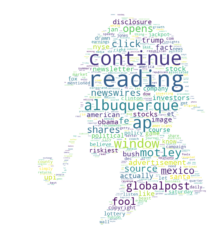

<Figure size 1008x1296 with 0 Axes>

In [16]:
### WordCloud of Importance Ranking from Random Forest
d = path.dirname("./")
qua_mask = np.array(Image.open(path.join(d, "Holmes_silhouette.png")))
wordcloud = WordCloud(background_color="white",prefer_horizontal=2,  max_words=500, mask=qua_mask)
wordcloud.generate_from_frequencies(wordcloud_imp_dct)
wordcloud.to_file(path.join(d, "hyperpartisan_news.png"))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## set the figure size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

In [17]:
#split reviews into 2 sets, prepare for TF-IDF
from __future__ import division, unicode_literals 
from sklearn.feature_extraction.text import TfidfTransformer  
from sklearn.feature_extraction.text import CountVectorizer  
import os

In [18]:
doc.head()

,text,labels
0,spam provides opportunity report technorati sh...,0
1,reports republicans give agree temporary unemp...,0
2,gop head senate russia probe still say moscow ...,1
3,rules saudi arabia madawi al rasheed visiting ...,1
4,winning numbers drawn palmetto cash game colum...,0


In [19]:
## Split the dataset into two sets
news_text = doc.loc[:,['labels','text']]
corpus=[]
label_1 = ''
label_0 = ''
for i, item in news_text.iterrows():
    item_dict = item.to_dict()
    #print item_dict["rating"]
    if int(item_dict["labels"]) == 0:
        label_0 =label_0 + ' ' + item_dict["text"]
    if int(item_dict["labels"]) == 1:
        label_1 =label_1 + ' '+ item_dict["text"]
    
print (len(label_0),len(label_1))
print (label_1[1:500], label_0[1:500], sep='\n')

14048982 15026906
gop head senate russia probe still say moscow trying help trump senate intelligence committee chairman richard burr right vice chairman mark warnerron sachs cnp via zuma sen richard burr r n c chairman senate intelligence committee walking thin line comes discussing panel investigation russian meddling election news conference wednesday burr described committee probe thorough nonpartisan referred moscow assault election serious urged government wide effort prevent similar interference upcoming 
spam provides opportunity report technorati shows blogosphere continues double size every five months new trend emerged weblog spam spam comments become real plague anyone operating open weblog also fake spam weblogs called splogs technorati says constitute percent new blogs sites like google blogger com make easy anyone create weblog minute two unfortunately also easy smart programmer write script create fake blogs icerocket founder mark cuban complained blog posting sunday ta

In [20]:
## append the dataset into one set
corpus.append(label_0)
corpus.append(label_1)
print (len(corpus))
os.system('say "program done"')

2


32512

In [21]:
#calculate TF-IDF with RF
transformer=TfidfTransformer(smooth_idf = True, sublinear_tf = True)
tfidf=transformer.fit_transform(bow_transformer.fit_transform(corpus))
weight=tfidf.toarray()
print (weight.shape)


(2, 94624)


In [22]:
#rank TF-IDF with RF
weight_sls = np.zeros(shape=(2,)) 
weight_index = np.zeros(shape=(1,))
for i in range(500):
    ind = importance_sort[i,0]
    weight_index = np.column_stack((weight_index,ind)) # random forest tree indices put into the empty container
    weight_sls = np.column_stack((weight_sls, weight[:,int(ind)])) # use the index in random forest #
                                                                    #to otain the values from tf-idf wegihts
     #w = weight[:,int(ind)]
weight_sls = np.concatenate((weight_sls, weight_index)) ## weight + position index
weight_sls = np.delete(weight_sls,0,axis=1)
print (weight_sls.shape)

(3, 500)


In [23]:
dct = {}
for i in range(weight_sls.shape[0]-1):
    dct['weight_label_%s' % i] = []
    
for i in range(weight_sls.shape[0]-1):  
    for j in range(weight_sls.shape[1]):
        row = []
        row.append(int(weight_sls[2,j]))
        row.append(weight_sls[i,j])
        
        dct['weight_label_%s' % i].append(row)
label_0_lt = dct['weight_label_0']
label_1_lt = dct['weight_label_1']
label_0_ar = np.array(label_0_lt)
label_1_ar = np.array(label_1_lt)

In [24]:
idex0=np.lexsort([-1*label_0_ar[:,1]])
label_0_sort=label_0_ar[idex0,:]

idex1=np.lexsort([-1*label_1_ar[:,1]])
label_1_sort=label_1_ar[idex1,:]
print ('done')

done


# Display Word Cloud for Each Dataset 

In [25]:
#Datat for non-partisan news
wordcloud_dct_0 = {}
wordsort_0 = []
for i in range(500):
    ind = label_0_sort[i,0]
    word = bow_transformer.get_feature_names()[int(ind)]
    wordsort_0.append(word)
    wordcloud_dct_0[str(word)] = float(label_0_sort[i,1])
print(wordsort_0[:10])

['unm', 'rancho', 'apos', 'powerball', 'bernalillo', 'reading', 'continue', 'ap', 'albuquerque', 'window']


In [26]:
#Datat for partisan news
wordcloud_dct_1 = {}
wordsort_1 = []
for i in range(500):
    ind = label_1_sort[i,0]
    word = bow_transformer.get_feature_names()[int(ind)]
    wordsort_1.append(word)
    wordcloud_dct_1[str(word)] = float(label_1_sort[i,1])
print(wordsort_1[:10])

['reading', 'continue', 'ap', 'albuquerque', 'window', 'motley', 'globalpost', 'opens', 'fool', 'click']


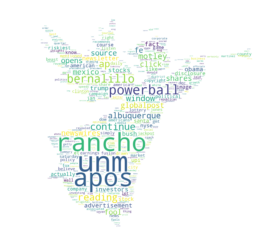

<Figure size 1008x1296 with 0 Axes>

In [27]:
### WordCloud for non-partisan news 
d = path.dirname("./")
qua_mask = np.array(Image.open(path.join(d, "angel.png")))
wordcloud = WordCloud(background_color="white",prefer_horizontal=2,  max_words=500, mask=qua_mask)
wordcloud.generate_from_frequencies(wordcloud_dct_0)
wordcloud.to_file(path.join(d, "label_0_news.png"))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## set the figure size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

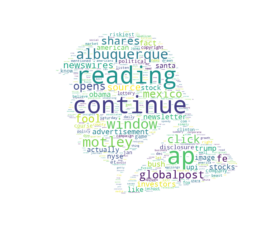

<Figure size 1008x1296 with 0 Axes>

In [29]:
### WordCloud for partisan news 
d = path.dirname("./")
qua_mask = np.array(Image.open(path.join(d, "trump_side.png")))
wordcloud = WordCloud(background_color="white",prefer_horizontal=2,  max_words=500, mask=qua_mask)
wordcloud.generate_from_frequencies(wordcloud_dct_1)
wordcloud.to_file(path.join(d, "label_1_news.png"))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## set the figure size
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# The following codes are achieved